# NumPy Basics

## Chapter Outline

- In this chapter, **you will learn about**:
> - `ndarray`, an **efficient multidimensional array** providing fast array-oriented arithmetic operations,
> - **Mathematical functions for fast operations** on entire arrays of data without having to write loops,
> - **Other useful stuff** like random number generation, linear algebra and statistics.

- **Where can you get help?**
> - **Follow along** with the code and **try it yourself**,
> - **Search** for it,
> - You can always **ask for help!**

## What is NumPy?

- A **third-party** package,
- Short for **Numerical Python**,
- In 2005, **Travis Oliphant was able to forge the NumPy project** from the then Numeric and Numarray projects into a single array computing framework,
- One of the most important foundational packages for **numerical computing** in Python,
- Much of the knowledge about NumPy that we will cover is **transferable to Pandas** as well.

## Python Lists Vs NumPy Arrays

- One of the reasons NumPy is so important for numerical computations in Python is because **it is designed for efficiency on large arrays of data**:
> - NumPy internally **stores data in a contiguous block of memory**, independent of other built-in Python objects,
> - NumPy **performs complex computations on entire arrays** without the need for Python for loops.

- To give you an idea of the **performance difference**, consider a Python list of one million integers, and the equivalent NumPy array:

In [ ]:
py_list = list(range(1_000_000))
len(py_list)

In [ ]:
import numpy as np
np_arr = np.array(range(1_000_000))
len(np_arr)

- Now let’s multiply each sequence by 2:

In [ ]:
%%time
result1 = [x * 2 for x in py_list]

In [ ]:
%%time
result2 = np_arr * 2

- NumPy-based algorithms are generally **10 to 100 times faster (or more)** than their pure Python counterparts and use significantly less memory.

## Working with NumPy arrays

### The NumPy ndarray

#### Getting started with `numpy`

- To get started using **NumPy**, the first step is to **import it**.- 
The most common way (and method you should use) is to** import NumPy as an abbreviatio**n



In [ ]:
import numpy as np

In [ ]:
# Check the version:
print(np.__version__)

- It is important to remember that **the main data type in NumPy is `ndarray`**, even seemingly different kinds of arrays are **still `ndarray`'s**.
- An ndarray is a **generic multidimensional container for homogeneous data** (that is, all of the elements must be the same type):

In [ ]:
# 1-dimensonal array, also referred to as a vector:
a1 = np.array([1, 2, 3])
a1

In [ ]:
# 2-dimensional array, also referred to as matrix
a2 = np.array([[1, 2.0, 3.3],
               [4, 5, 6.5]])
a2

In [ ]:
# 3-dimensional array, also referred to as a matrix
a3 = np.array([[[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]],
                [[10, 11, 12],
                 [13, 14, 15],
                 [16, 17, 18]]])
a3

#### Anatomy of a NumPy Array

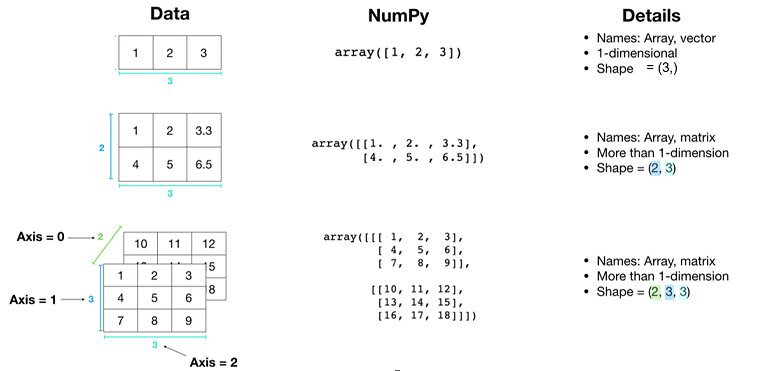

- The **main attributes** of an ndarray are shape, number of dims, data type and size:


In [ ]:
print(type(a1))
print(a1.size)
print(a1.shape)
print(a1.ndim)
print(a1.dtype)

In [ ]:
print(type(a2))
print(a2.size)
print(a2.shape)
print(a2.ndim)
print(a2.dtype)

In [ ]:
print(type(a3))
print(a3.size)
print(a3.shape)
print(a3.ndim)
print(a3.dtype)

#### Creating NumPy Arrays

- The easiest way to create an array is to **use the array function**, this accepts any **sequence-like object** (including other arrays) and produces a new NumPy array containing the passed data:

In [ ]:
py_list = [1, 2, 3]
np_arr = np.array(py_list)
np_arr

- Also, there are a number of **other functions for creating new arrays**:

In [ ]:
zeros_arr = np.zeros(shape=(2, 2))
zeros_arr

In [ ]:
ones_arr = np.ones(shape=(2, 2))
ones_arr

In [ ]:
ones_arr.dtype

In [ ]:
ones_arr = ones_arr.astype(int)
ones_arr.dtype

In [ ]:
full_arr = np.full(shape=(2, 2), fill_value=2)
full_arr

In [ ]:
empty_arr = np.empty(shape=(2, 2))
empty_arr # It’s not safe to assume that numpy.empty will return an array of all zeros.

In [ ]:
id_arr = np.identity(n=3)
id_arr

In [ ]:
zeros_like_arr = np.zeros_like(py_list)
zeros_like_arr

In [ ]:
arange_arr = np.arange(1, 10, 1)
arange_arr

In [ ]:
equally_spaced_nums_arr = np.linspace(1, 10, 10)
equally_spaced_nums_arr

- The NumPy `random` module supplements the **built-in Python random module** with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions:

In [ ]:
rng = np.random.default_rng(seed=42)

In [ ]:
int_arr = rng.integers(low=1, high=10, size=5)
int_arr

In [ ]:
float_arr = rng.random(size=5)
float_arr

### Filtering and Reshaping NumPy Arrays

#### Basic Indexing and Slicing

##### Basic Indexing

- One-dimensional arrays are simple; on the surface they **act similarly to Python lists**:

In [ ]:
a1 = np.arange(10)
a1

In [ ]:
idx = a1[5]
idx

- An important first distinction from Python’s built-in lists is that **array slices are views on the original array**:

In [ ]:
slice = a1[5:8]
slice

In [ ]:
slice[1] = 0
slice

In [ ]:
a1

- If you want a copy of a slice of an ndarray instead of a view, **you will need to explicitly copy the array**:

In [ ]:
a1 = np.arange(10)
a1

In [ ]:
slice = a1[5:8].copy()
slice[1] = 0
slice

In [ ]:
a1

- In a two-dimensional array, **the elements at each index are no longer scalars but rather one-dimensional arrays**:

In [ ]:
a2 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
a2

In [ ]:
a2.shape

In [ ]:
a2[1]

In [ ]:
a2[1].shape

- Individual elements can be **accessed recursively**:

In [ ]:
a2[1][1]

In [ ]:
a2[1][1].shape

- You can pass a **comma-separated list of indices** to select individual elements:

In [ ]:
a2[1, 1]

In [ ]:
a2[1, 1].shape

- In multidimensional arrays, **if you omit later indices, the returned object will be a lower dimensional ndarray** consisting of all the data along the higher dimensions:

In [ ]:
a3 = np.array([[[ 1, 2, 3],
                [ 4, 5, 6]],
               [[ 7, 8, 9],
                [10, 11, 12]]])
a3

In [ ]:
a3[0]

In [ ]:
a3[0].shape

In [ ]:
a3[0, 0]

In [ ]:
a3[0, 0].shape

##### Indexing with slices

- Like one-dimensional objects such as Python lists, **ndarrays can be sliced with the familiar syntax**:

In [ ]:
a1

In [ ]:
a1[1:6]

- Consider the **two-dimensional array** from before, slicing this array is a bit different:

In [ ]:
a2

In [ ]:
a2[:2]

- You can pass **multiple slices** just like you can pass multiple indexes:

In [ ]:
a2[:2, 1:]

- By **mixing integer indexes and slices**, you get **lower dimensional** slices:

In [ ]:
a2[:2, 1]

In [ ]:
a2[:2, 1].shape

- See this **figure** for an illustration:

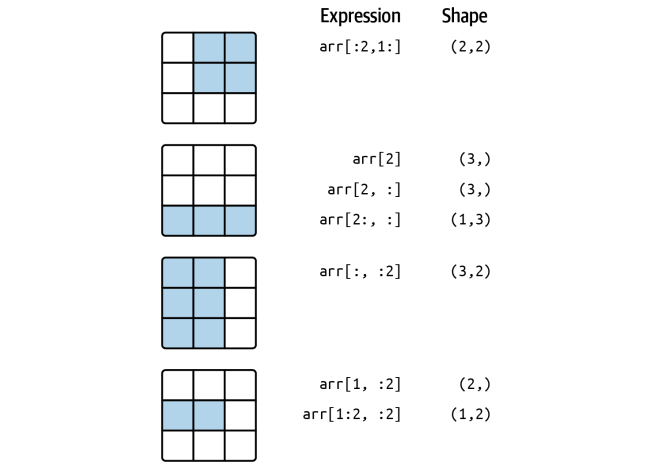

#### Boolean Indexing

- **What is Boolean indexing (masking)?**
  > - Boolean indexing involves **using boolean arrays** to index or filter data in NumPy arrays,
  > - A Boolean array is created **by applying a condition to an existing array**, resulting in a new array of `True` and `False` values
  > - The Boolean array is then **used as an index** to select elements from the original array.

- Let’s consider an example where we have some **data** in an array and an array of **names** with duplicates:

In [ ]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

In [ ]:
data = np.array([[4, 7],
                 [0, 2],
                 [-5, 6],
                 [0, 0],
                 [1, 2],
                 [-12, -4],
                 [3, 4]])
data

- Suppose each name corresponds to a row in the data array and we wanted to **select all the rows with the corresponding name "Bob"**:

In [ ]:
names == 'Bob'

- This Boolean array **can be passed when indexing the array**:

In [ ]:
data[names == 'Bob']

- You can even **mix and match Boolean arrays with slices or integers**:

In [ ]:
data[names == 'Bob', 1:]

- To **select everything but "Bob"** you can either **use `!=` or negate the condition using `~`**:

In [ ]:
data[names != 'Bob']

In [ ]:
data[~(names == 'Bob')]

- To select two of the three names **to combine multiple Boolean conditions, use Boolean arithmetic operators** like `&` (and) and `|` (or):

In [ ]:
mask = (names == "Bob") | (names == "Will")
mask

In [ ]:
data[mask]

- **The Python keywords `and` and `or` do not work with Boolean arrays, use `&` (and) and `|` (or) instead.**
- **Selecting data from an array by Boolean indexing and assigning the result to a new variable always creates a copy of the data, even if the returned array is unchanged.**

- Setting values with Boolean arrays works by substituting the value or values on the righthand side into the locations **where the Boolean array’s values are `True`**:

In [ ]:
data[data < 0]

In [ ]:
data[data < 0] = 0
data

#### Fancy Indexing

- **What is fancy indexing?**
> - Fancy indexing refers to **using arrays of indices** to access or modify elements in a NumPy array,
> -  It allows for **advanced and non-contiguous indexing**, providing flexibility in selecting elements.

- Suppose we had an 8 × 4 array:

In [ ]:
arr = np.zeros(shape=(8, 4))
arr

In [ ]:
for i in range(len(arr)):
    arr[i] = i

In [ ]:
arr

- To select a **subset of the rows in a particular order**, you can simply pass a list or ndarray of integers specifying the desired order:

In [ ]:
arr[[4, 3, 0, 6]]

- **Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array when assigning the result to a new variable.**

#### Reshaping arrays

- Another useful type of operation is reshaping of arrays, which can be done with the `.reshape()` method:

In [ ]:
arr = np.arange(1, 10)
arr

In [ ]:
reshaped_arr = arr.reshape((3, 3))
reshaped_arr

- Transposing is a **special form of reshaping** that similarly returns a **view on the underlying data** without copying anything.
- Arrays have the **`.transpose()` method** and the special **`.T` attribute**.

In [ ]:
reshaped_arr

In [ ]:
reshaped_arr.T

### Working with NumPy Arrays

#### Universal Functions

- A universal function, or **ufunc**, is a **function that performs element-wise operations on data in ndarrays**, this is called **vectorizaion**.
- **Rules of vectorization:**
> - Arrays must be of **equal-size**,
> - Operations are applied  **element-wise**.

In [ ]:
arr1 = np.array([[1., 2., 3.], [4., 5., 6.]])
arr1

In [ ]:
arr1 + arr1

In [ ]:
arr2 = arr1.T
arr2

In [ ]:
arr1 + arr2

In [ ]:
arr2 = np.array([1, 1, 1])
arr2

In [ ]:
arr1 + arr2

- **Broadcasting extends the concept of vectorization to arrays of different shapes**, allowing them to be used together in operations.
- **Rules of broadcasting:**
> - If the **two arrays differ in their number of dimensions**, the shape of the one with fewer dimensions is padded with ones on its leading (left) side,
> - If the **shape of the two arrays does not match in any dimension**, the array with shape equal to 1 in that dimension is stretched to match the other shape,
> - If in any dimension **the sizes disagree and neither is equal to 1**, an error is raised.

In [ ]:
arr1 = np.arange(3)
arr1

In [ ]:
arr1 + 5

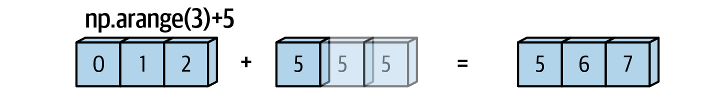

In [ ]:
arr2 = np.ones(shape=(3, 3))
arr2

In [ ]:
arr2 + arr1

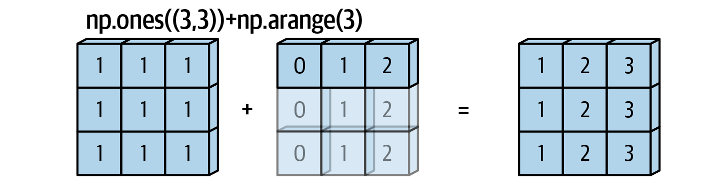

In [ ]:
arr3 = arr1.reshape((3, 1))
arr3

In [ ]:
arr3 + arr1

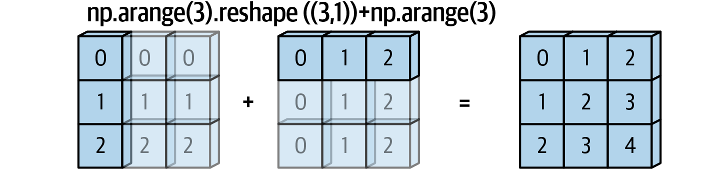

- Some **binary unfuncs**:

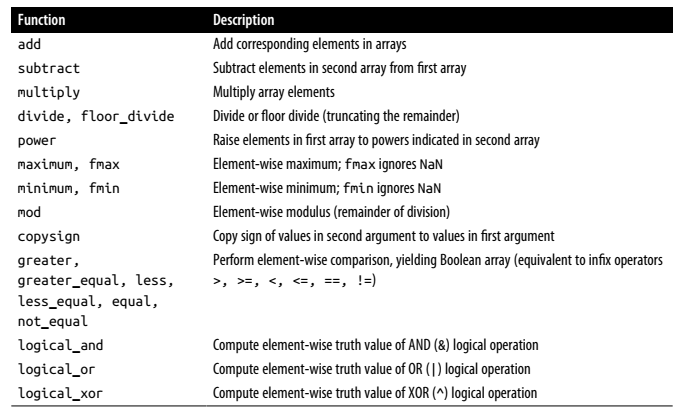

#### Arithmetic with NumPy Arrays

- NumPy enables efficient and concise arithmetic operations on arrays, **both element-wise and using broadcasting**.
- NumPy’s ufuncs feel very natural to use because they **make use of Python’s native arithmetic operators**, the standard addition, subtraction, multiplication, and division can all be used:

In [ ]:
arr = np.arange(1, 7).reshape((2, 3))
arr

In [ ]:
np.add(arr, 1)

In [ ]:
arr + 1

In [ ]:
arr - 2

In [ ]:
arr * 2

In [ ]:
arr / 2

In [ ]:
arr // 2

In [ ]:
arr % 2

In [ ]:
arr ** 2

- Multiplying two two-dimensional arrays with `*` is an **element-wise product**, while **matrix multiplication** require using another operator `@`:

In [ ]:
arr1 = np.arange(1, 4).reshape((1, 3))
arr1

In [ ]:
arr2 = np.arange(1, 7).reshape((3, 2))
arr2

In [ ]:
arr1 @ arr2

- All of these arithmetic operations are **simply convenient wrappers around the ufuncs built into NumPy**. 

#### Aggregations

- Summing the values in an array:

In [ ]:
arr = np.arange(1, 10).reshape((3, 3))
arr

In [ ]:
np.sum(arr)

In [ ]:
np.sum(arr, axis=0)

In [ ]:
np.sum(arr, axis=1)

- Minimum and maximum:

In [ ]:
arr

In [ ]:
np.max(arr)

In [ ]:
np.min(arr, axis=0)

In [ ]:
np.min(arr, axis=1)

- Mean, variance and standard deviation:

In [ ]:
arr

In [ ]:
np.mean(arr)

In [ ]:
np.var(arr)

In [ ]:
np.std(arr)

In [ ]:
np.std(arr, ddof=1)